In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load data

import requests

player_name = "LeBron James"

# Make API request to retrieve player ID
player_search_url = f"https://www.balldontlie.io/api/v1/players?search={player_name}"
response = requests.get(player_search_url)
player_data = response.json()

if player_data["meta"]["total_count"] == 0:
    print("Player not found.")
else:
    player_id = player_data["data"][0]["id"]

    # Make API request to retrieve player stats by season
    seasons = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
    stats_total = []
    
    for s in seasons:
        player_stats_url = f"https://www.balldontlie.io/api/v1/season_averages?season={s}&player_ids[]={player_id}"
        response = requests.get(player_stats_url)
        stats_data = response.json()
        stats_total.append(stats_data['data'])
    

In [3]:
# Flatten the nested list of dictionaries
flattened_data = [item for sublist in stats_total for item in sublist]

# Create a DataFrame from the flattened data
df = pd.DataFrame(flattened_data).set_index('season')
display(df)

,games_played,player_id,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,...,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct
season,,,,,,,,,,,,,,,,,,,,,
2003,79,237,39:34,7.87,18.89,0.80,2.75,4.39,5.82,1.25,...,5.47,5.89,1.65,0.73,3.46,1.89,20.94,0.417,0.290,0.754
2004,80,237,42:17,9.94,21.05,1.35,3.85,5.96,7.95,1.39,...,7.35,7.21,2.21,0.65,3.28,1.83,27.19,0.472,0.351,0.750
2005,79,237,42:31,11.08,23.08,1.61,4.80,7.61,10.30,0.95,...,7.04,6.59,1.56,0.84,3.29,2.29,31.37,0.480,0.335,0.738
2006,78,237,40:54,9.90,20.78,1.27,3.97,6.27,8.99,1.06,...,6.74,6.03,1.60,0.71,3.21,2.19,27.33,0.476,0.319,0.698
2007,75,237,40:21,10.59,21.89,1.51,4.79,7.32,10.28,1.77,...,7.89,7.19,1.84,1.08,3.40,2.20,30.00,0.484,0.315,0.712
2008,81,237,37:42,9.74,19.91,1.63,4.74,7.33,9.41,1.31,...,7.57,7.25,1.69,1.15,2.98,1.72,28.44,0.489,0.344,0.780
2009,76,237,39:01,10.11,20.11,1.70,5.09,7.80,10.17,0.93,...,7.29,8.57,1.64,1.01,3.43,1.57,29.71,0.503,0.333,0.767
2010,79,237,38:46,9.59,18.80,1.16,3.53,6.37,8.39,1.01,...,7.47,7.01,1.57,0.63,3.59,2.06,26.72,0.510,0.330,0.759
2011,62,237,37:32,10.02,18.85,0.87,2.40,6.24,8.10,1.52,...,7.94,6.24,1.85,0.81,3.44,1.55,27.15,0.531,0.362,0.771


In [7]:
# Add total points column

df['total_pts'] = df['pts'] * df['games_played']

,games_played,player_id,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,...,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct,total_pts
season,,,,,,,,,,,,,,,,,,,,,
2003,79,237,39:34,7.87,18.89,0.80,2.75,4.39,5.82,1.25,...,5.89,1.65,0.73,3.46,1.89,20.94,0.417,0.290,0.754,1654.26
2004,80,237,42:17,9.94,21.05,1.35,3.85,5.96,7.95,1.39,...,7.21,2.21,0.65,3.28,1.83,27.19,0.472,0.351,0.750,2175.20
2005,79,237,42:31,11.08,23.08,1.61,4.80,7.61,10.30,0.95,...,6.59,1.56,0.84,3.29,2.29,31.37,0.480,0.335,0.738,2478.23
2006,78,237,40:54,9.90,20.78,1.27,3.97,6.27,8.99,1.06,...,6.03,1.60,0.71,3.21,2.19,27.33,0.476,0.319,0.698,2131.74
2007,75,237,40:21,10.59,21.89,1.51,4.79,7.32,10.28,1.77,...,7.19,1.84,1.08,3.40,2.20,30.00,0.484,0.315,0.712,2250.00
2008,81,237,37:42,9.74,19.91,1.63,4.74,7.33,9.41,1.31,...,7.25,1.69,1.15,2.98,1.72,28.44,0.489,0.344,0.780,2303.64
2009,76,237,39:01,10.11,20.11,1.70,5.09,7.80,10.17,0.93,...,8.57,1.64,1.01,3.43,1.57,29.71,0.503,0.333,0.767,2257.96
2010,79,237,38:46,9.59,18.80,1.16,3.53,6.37,8.39,1.01,...,7.01,1.57,0.63,3.59,2.06,26.72,0.510,0.330,0.759,2110.88
2011,62,237,37:32,10.02,18.85,0.87,2.40,6.24,8.10,1.52,...,6.24,1.85,0.81,3.44,1.55,27.15,0.531,0.362,0.771,1683.30


In [10]:
# Data preprocessing

# Shape of dataset
print("Shape of Training dataset:", df.shape)

# Checking null values for training dataset
df.isnull().sum()

Shape of Training dataset: (20, 22)


games_played    0
player_id       0
min             0
fgm             0
fga             0
fg3m            0
fg3a            0
ftm             0
fta             0
oreb            0
dreb            0
reb             0
ast             0
stl             0
blk             0
turnover        0
pf              0
pts             0
fg_pct          0
fg3_pct         0
ft_pct          0
total_pts       0
dtype: int64

In [12]:
df.describe()

,games_played,player_id,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,...,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct,total_pts
count,20.00000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000
mean,71.00000,237.0,9.978000,19.740500,1.635500,4.741000,5.595500,7.625000,1.159500,6.388000,...,7.345000,1.513000,0.750500,3.506000,1.830500,27.18450,0.506600,0.344350,0.733000,1930.041000
std,10.82395,0.0,0.762631,1.566506,0.501172,1.401442,1.222622,1.571364,0.266112,0.798595,...,1.132024,0.298507,0.209221,0.336568,0.250798,2.28672,0.035093,0.026573,0.033997,338.177349
min,45.00000,237.0,7.870000,17.570000,0.800000,2.400000,3.940000,5.670000,0.640000,4.220000,...,5.890000,0.910000,0.340000,2.970000,1.450000,20.94000,0.417000,0.290000,0.665000,1125.900000
25%,65.75000,237.0,9.675000,18.607500,1.330000,3.815000,4.675000,6.317500,1.005000,5.967500,...,6.527500,1.325000,0.607500,3.280000,1.655000,26.14250,0.487000,0.328500,0.707000,1676.040000
50%,76.00000,237.0,9.955000,19.360000,1.620000,4.765000,5.365000,7.600000,1.155000,6.390000,...,7.200000,1.570000,0.710000,3.450000,1.785000,27.17000,0.506500,0.346000,0.744000,1995.190000
75%,79.00000,237.0,10.225000,20.847500,1.870000,5.305000,6.295000,8.540000,1.310000,7.045000,...,7.897500,1.660000,0.872500,3.625000,1.985000,28.56250,0.525000,0.362250,0.756750,2193.900000
max,82.00000,237.0,11.330000,23.080000,2.810000,7.940000,7.800000,10.300000,1.770000,7.460000,...,10.210000,2.210000,1.150000,4.230000,2.290000,31.37000,0.567000,0.406000,0.780000,2478.230000


<AxesSubplot:>

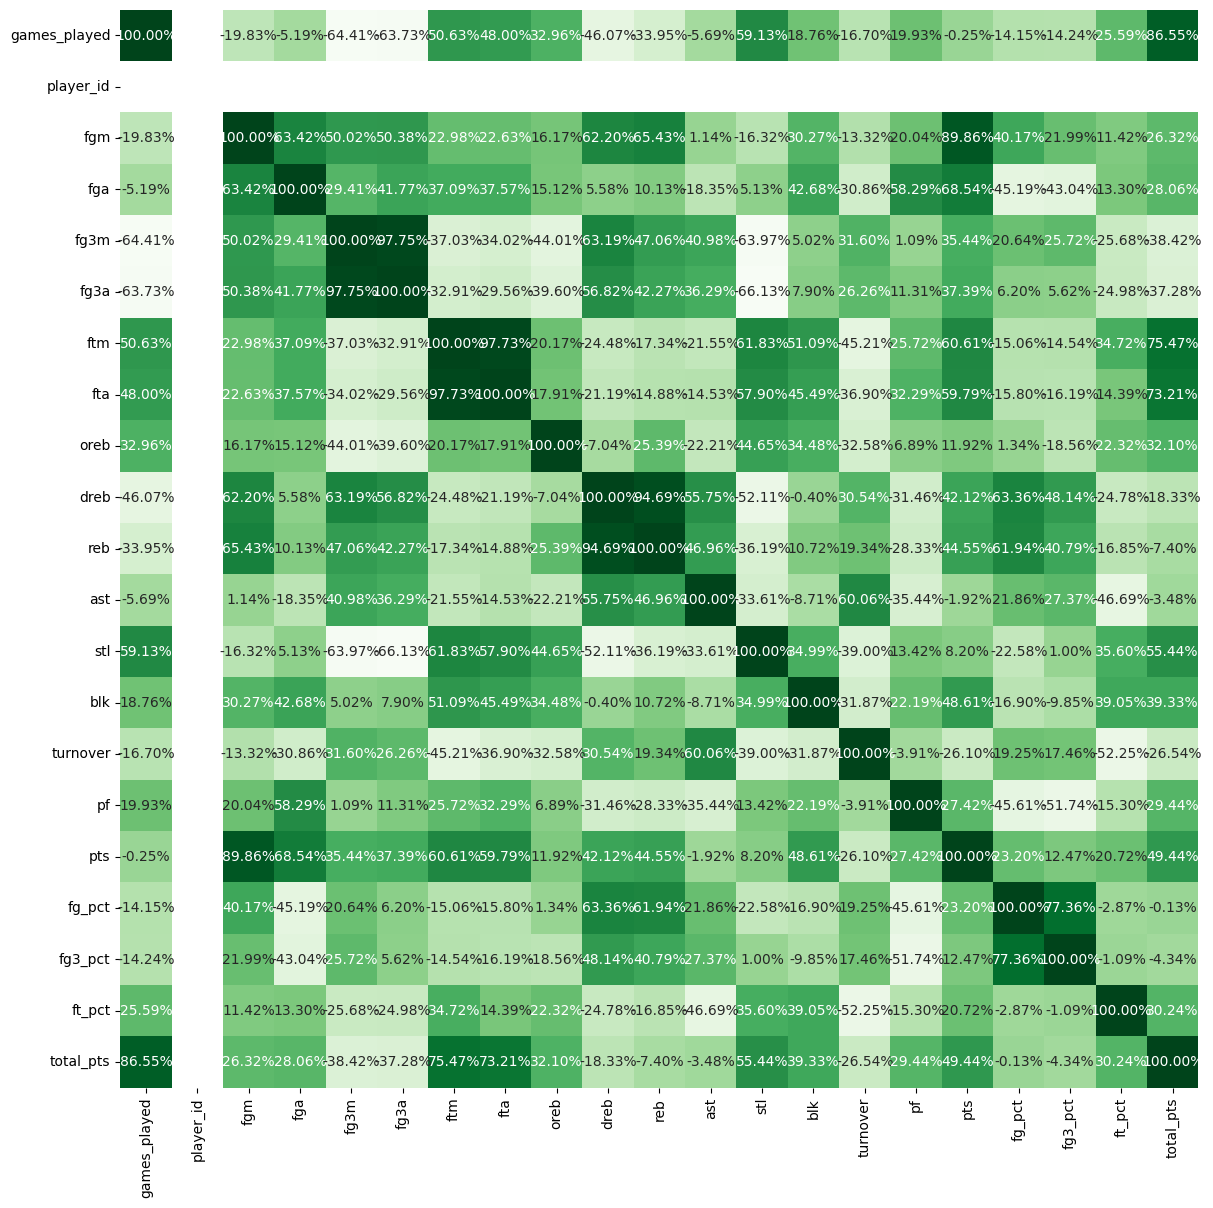

In [21]:
corr = df.corr()
corr.shape

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

c:\Users\Ariel\miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


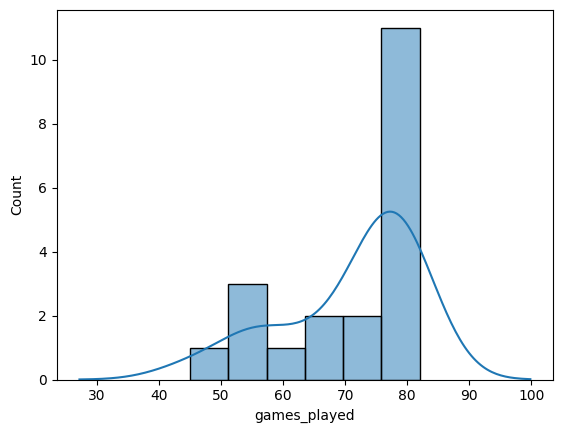

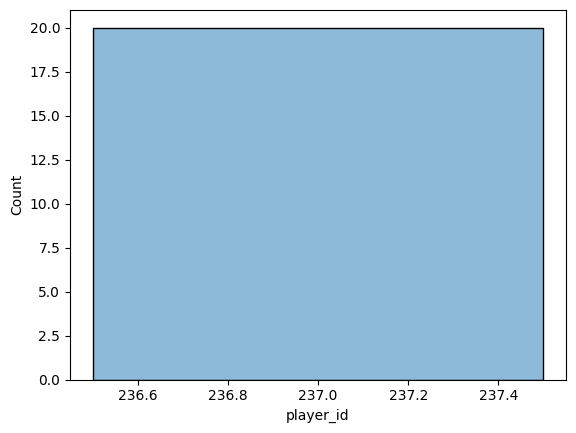

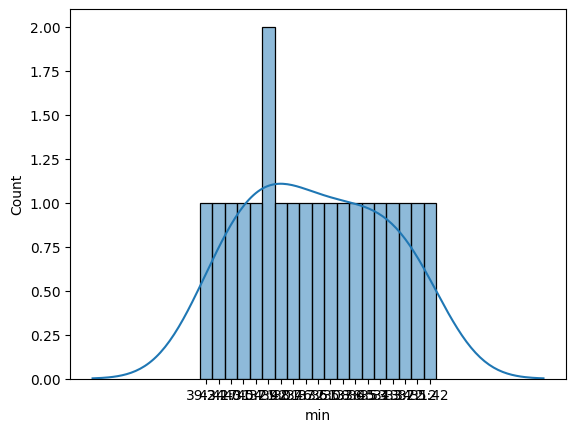

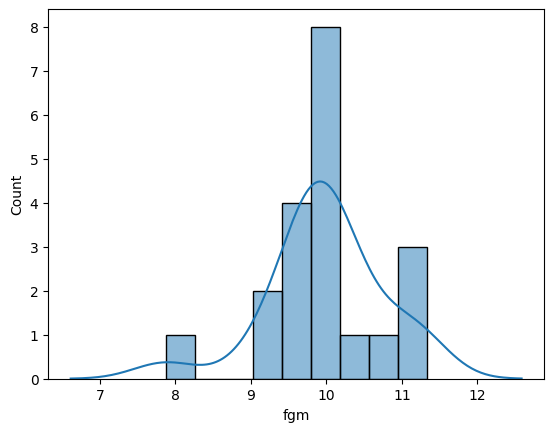

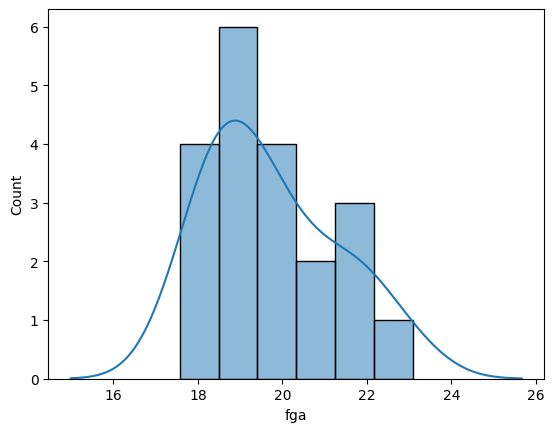

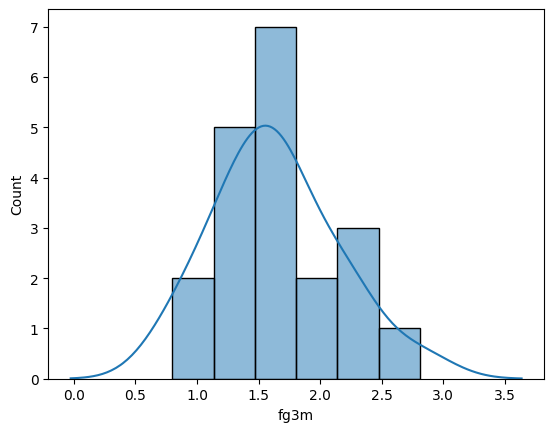

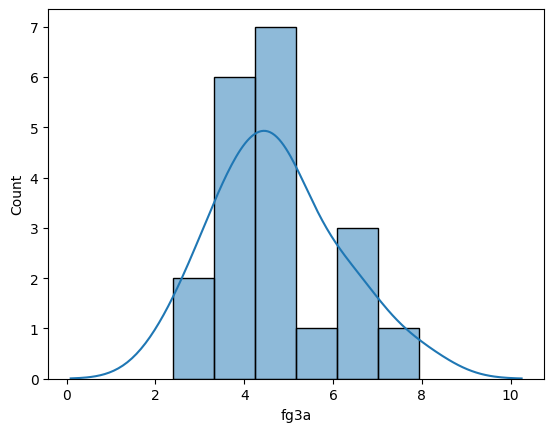

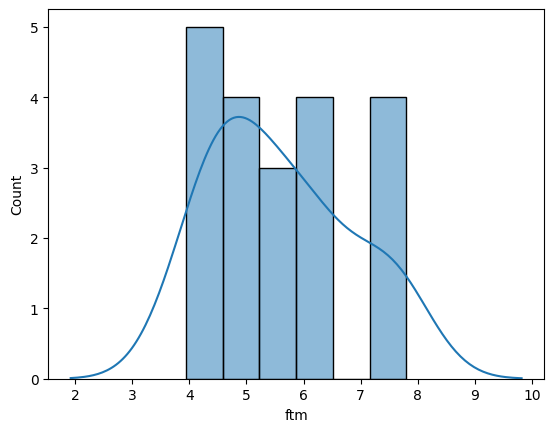

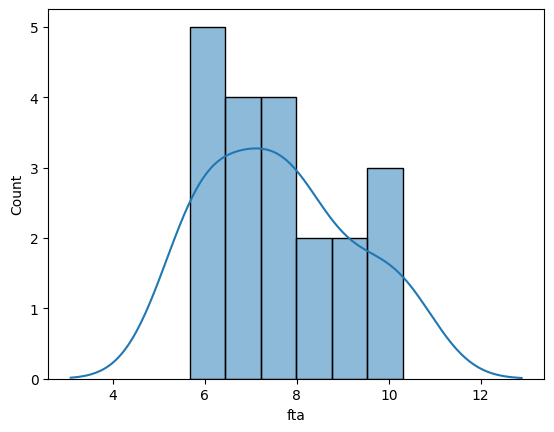

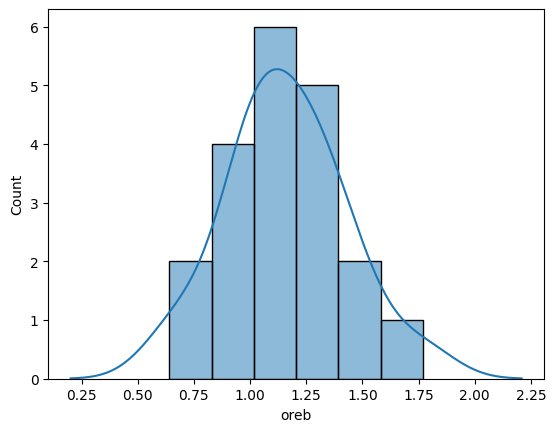

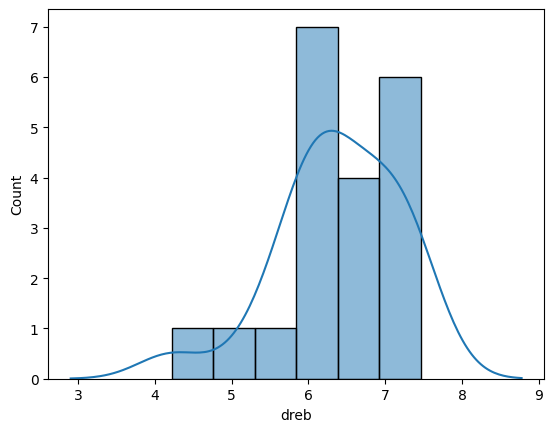

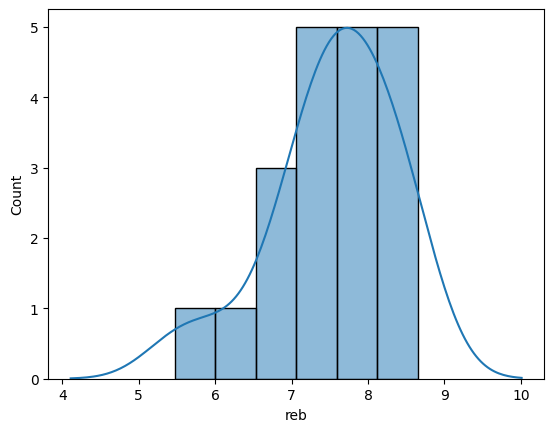

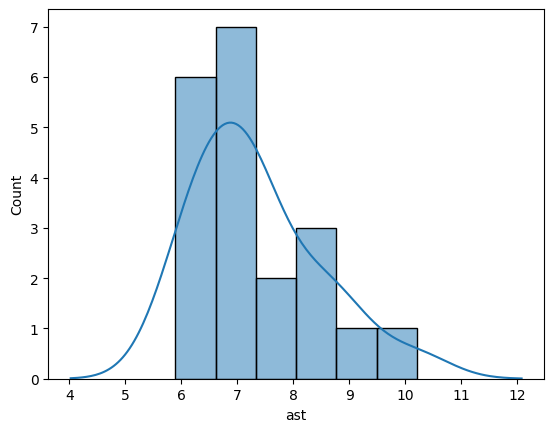

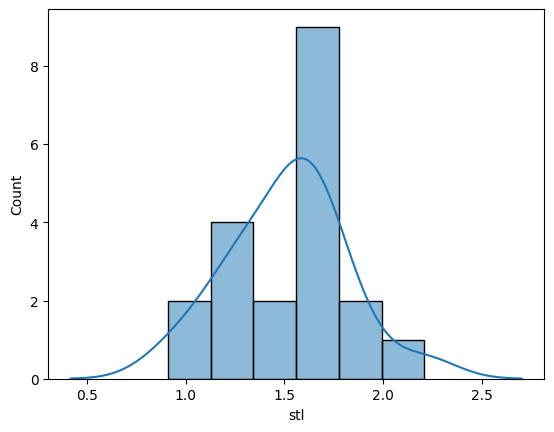

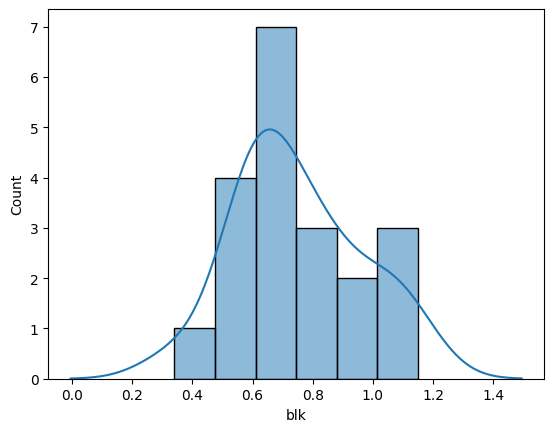

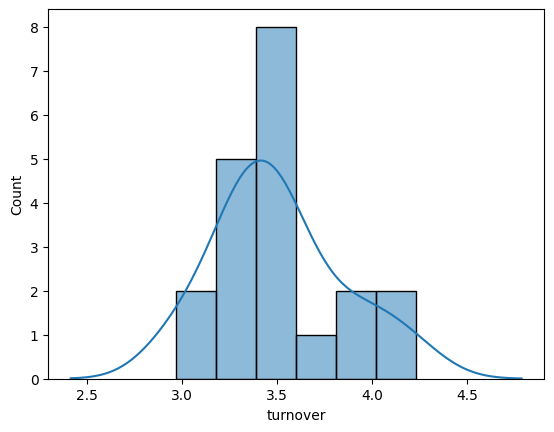

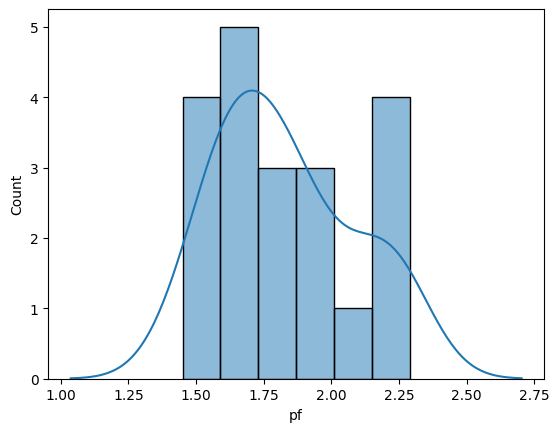

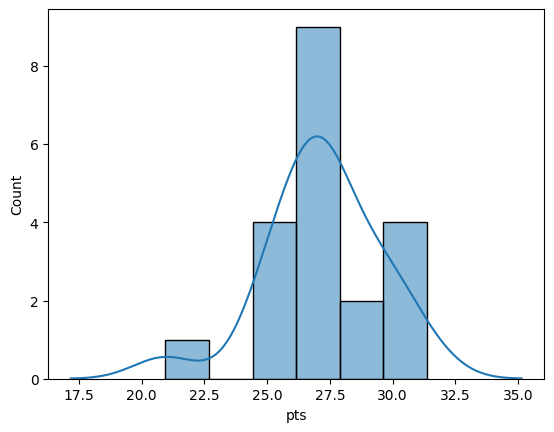

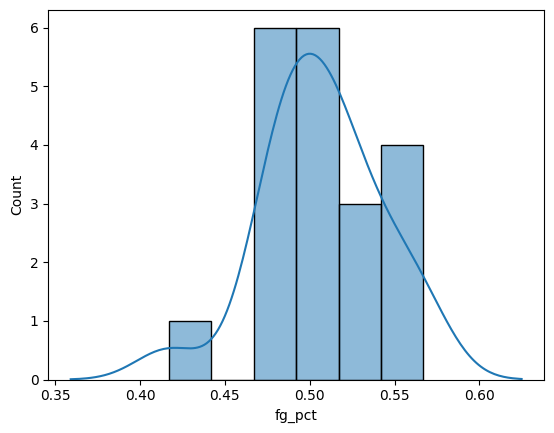

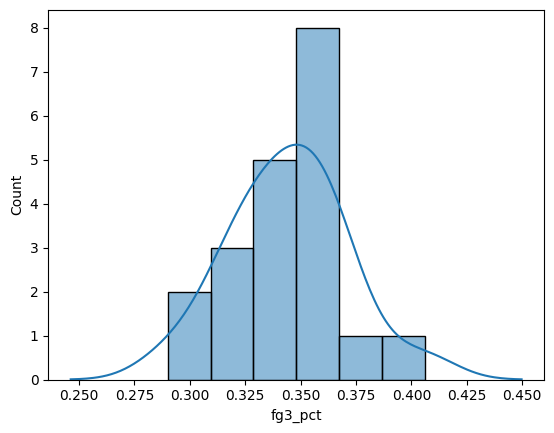

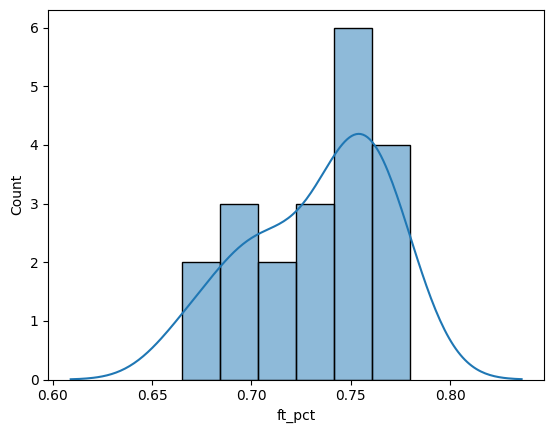

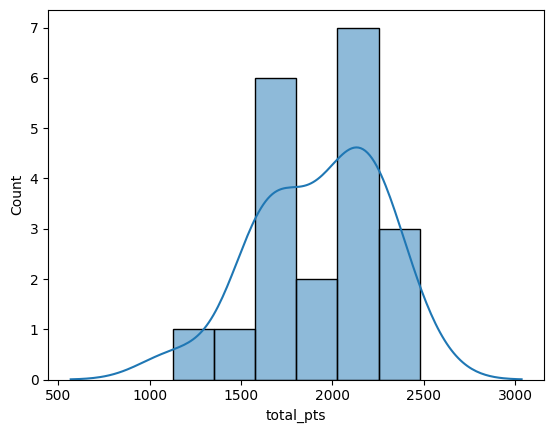

In [34]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col], kde=True, kde_kws={"cut": 3})

In [ ]:

# Step 3: Feature selection

# Step 4: Split the data into training and testing sets
X = data[['games_played', 'feature2', ...]]  # Select relevant features
y = data['total_pts']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Choose and train a model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Step 7: Make predictions for the next season
next_season_data = pd.read_csv('next_season_data.csv')
next_season_points = model.predict(next_season_data[['feature1', 'feature2', ...]])

print("Predicted points for next season:", next_season_points)
